In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#leer el csv
df = pd.read_csv('sales_videoGame.csv')
#imprimir la tabla
print("Dimensiones:", df.shape)
print(df.columns)
print(df.head())
print(df.info())

# Agrupamos por Género y Rating, y sumamos las ventas globales
ventas_por_genero_rating = df.groupby(['Genre', 'Rating'])['Global_Sales'].sum().reset_index()

# Ordenamos de mayor a menor por ventas
ventas_ordenadas = ventas_por_genero_rating.sort_values(by='Global_Sales', ascending=False)

# Mostramos el top 10
print(ventas_ordenadas.head(10))
# Agrupar por Rating y sumar las ventas globales
ventas_por_rating = df.groupby('Rating')['Global_Sales'].sum().reset_index()

# Ordenar de mayor a menor
ventas_por_rating = ventas_por_rating.sort_values(by='Global_Sales', ascending=False)

# Mostrar la tabla
print(ventas_por_rating)

# Preprocesamiento de datos
print("PREPROCESAMIENTO DE DATOS")
print("Data Cleaning")
#Cantidad de nulos por columna
print(df.isnull().sum())
#Buscar las filas que tienen nulo el nombre del Juego
print(df[df['Name'].isnull()])
#Borrar estas filas
df = df.drop(index=659) 
df = df.drop(index=14246) 

# Eliminar filas donde la columna 'Rating' es nula
df = df.dropna(subset=['Rating'])

#Se le asigna un valor a los valores nulos de Publisher y las otras columnas con mayores valores nulos
df['Publisher'] = df['Publisher'].fillna('unknow')
df['Critic_Score'] = df['Critic_Score'].fillna('0')
df['Critic_Count'] = df['Critic_Count'].fillna('0')
df['User_Score'] = df['User_Score'].fillna('0')
df['User_Count'] = df['User_Count'].fillna('0')
df['Year_of_Release'] = df['Year_of_Release'].fillna('0')

#Cantidad de nulos por columna
print(df.isnull().sum())

# Datos Duplicados
print("Cantidad de filas dupliadas: ", df.duplicated().sum())

#Datos Atipicos
#Datos categoricos

Dimensiones: (16719, 16)
Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')
                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2    

In [34]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,User_Score_num
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,8.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,8.3
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,8.0
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,8.5
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16701,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,53.0,4.0,tbd,0,Taito Corporation,E,NaN
16702,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01,48.0,10.0,tbd,0,Interchannel-Holon,E,NaN
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,12.0,7.2,13.0,SimBin,E10+,7.2
16708,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01,0,0,tbd,0,Big John Games,E,NaN


<Axes: xlabel='Developer'>

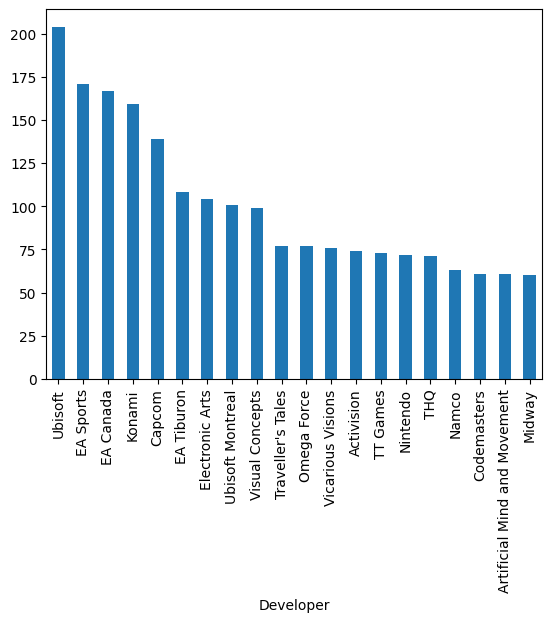

In [36]:
top = df['Developer'].value_counts().nlargest(20)
top.plot(kind='bar')

<Axes: xlabel='Developer'>

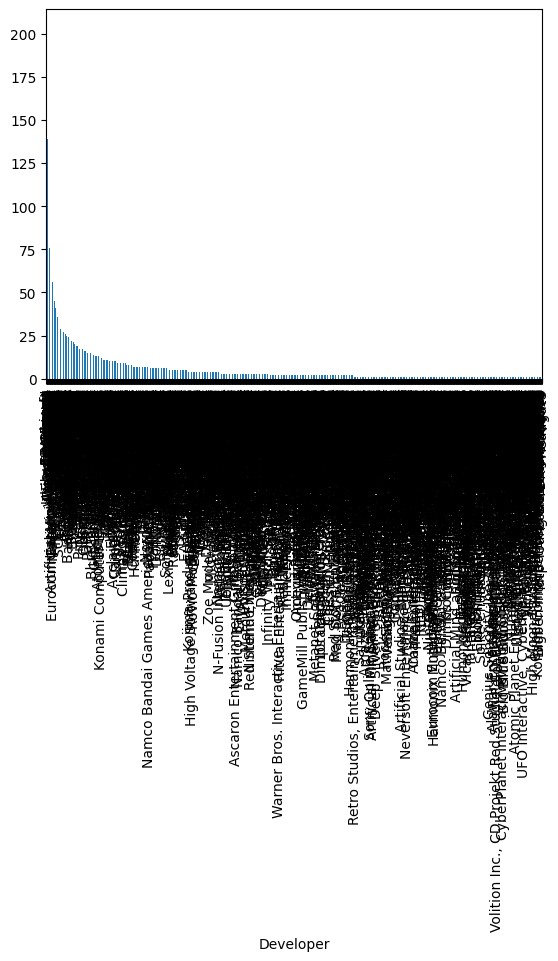

In [35]:
values = df['Developer'].value_counts()
values.plot(kind='bar')

<Axes: xlabel='Platform'>

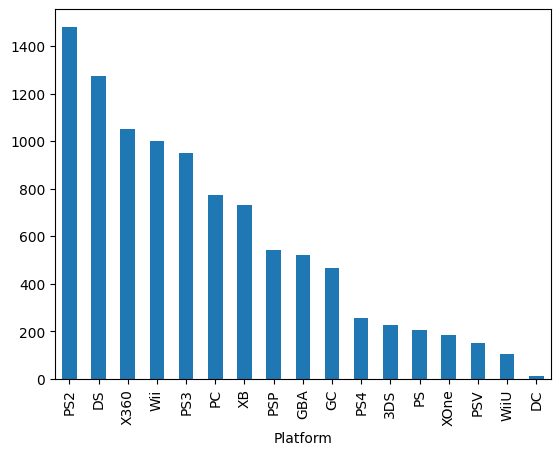

In [7]:
values = df['Platform'].value_counts()
values.plot(kind='bar')

<Axes: xlabel='Genre'>

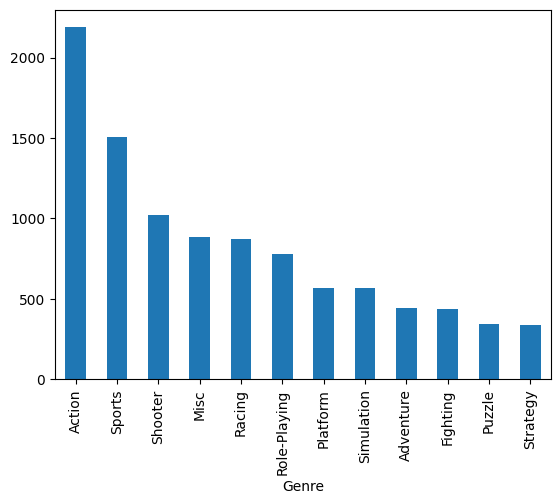

In [ ]:
values = df['Genre'].value_counts()
values.plot(kind='bar')

<Axes: xlabel='Publisher'>

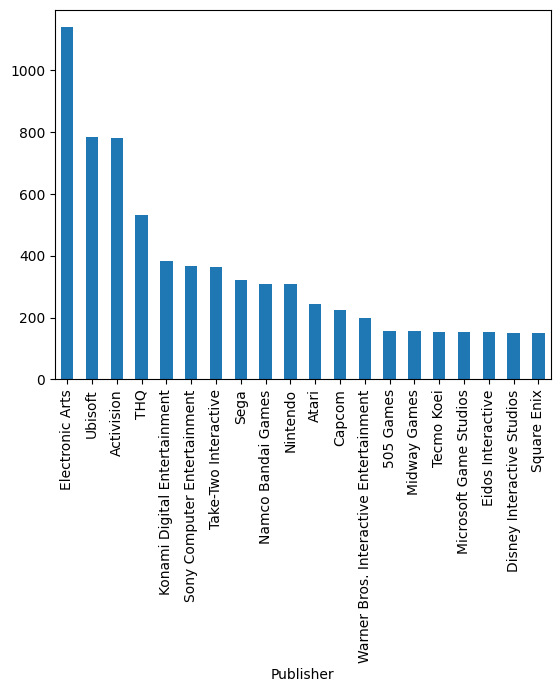

In [37]:
values = df['Publisher'].value_counts()
values.plot(kind='bar')
top = df['Publisher'].value_counts().nlargest(20)
top.plot(kind='bar')

<Axes: xlabel='Rating'>

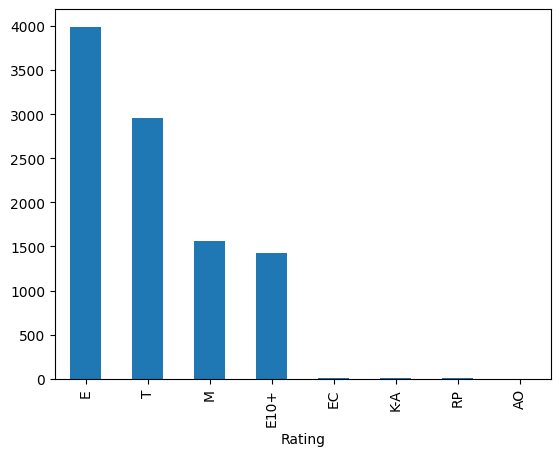

In [12]:
values = df['Rating'].value_counts()
values.plot(kind='bar')

<Axes: xlabel='User_Score'>

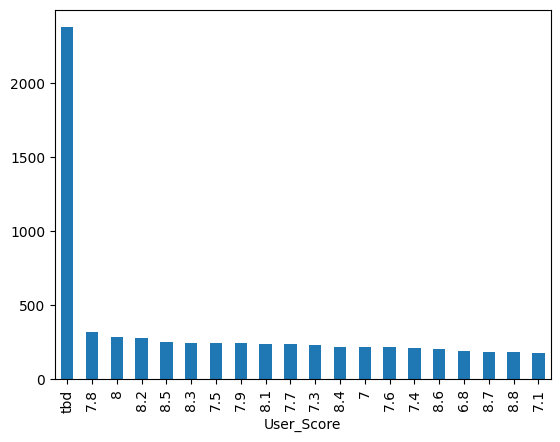

In [ ]:
#Convertir User_Score a numerico ya que TBD -> Es terminado
top = df['User_Score'].value_counts().nlargest(20)
top.plot(kind='bar')

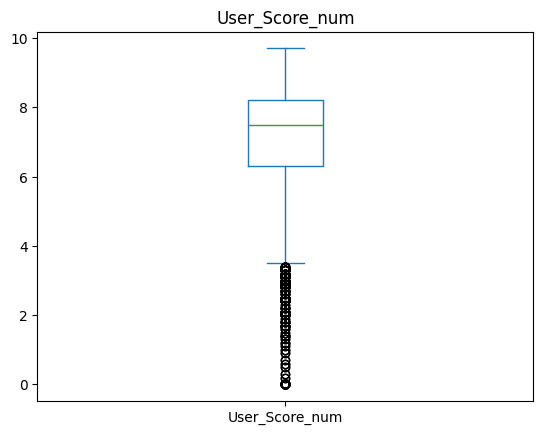

In [32]:
df['User_Score_num'] = pd.to_numeric(df['User_Score'], errors='coerce')
df['User_Score_num'] = df['User_Score_num'].fillna('10')
df['User_Score_num'] = pd.to_numeric(df['User_Score'], errors='coerce')
df['User_Score_num'].plot.box()
plt.title('User_Score_num')
plt.show()

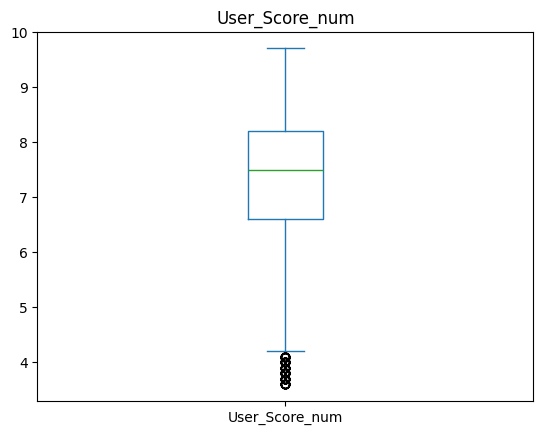

In [64]:
# Cálculo de límites
limit_sup = df['User_Score_num'].mean() + 3 * df['User_Score_num'].std()
limit_inf = df['User_Score_num'].mean() - 3 * df['User_Score_num'].std()

# Valor de la media
media = df['User_Score_num'].mean()

# Reemplazo de outliers con la media
df['User_Score_num'] = df['User_Score_num'].apply(
    lambda x: media if x > limit_sup or x < limit_inf else x
)

df['User_Score_num'].plot.box()
plt.title('User_Score_num')
plt.show()

In [224]:
df["Rating_Years"] = df["Rating"].map({"EC": 3, "E": 6, "E10+":10, "T":13, "M":17, "AO":18})
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,User_Score_num,Rating_Years
0,Wii Sports,Wii,2006.0,Sports,Nintendo,0.317604,0.181994,0.005544,0.064348,0.609959,76.0,51.000000,8,36.607012,Nintendo,E,8.0,6.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,0.317604,0.181994,0.005544,0.064348,0.609959,82.0,19.952043,8.3,75.348206,Nintendo,E,8.3,6.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,0.317604,0.181994,0.005544,0.064348,0.609959,80.0,19.952043,8,30.155174,Nintendo,E,8.0,6.0
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,0.317604,0.181994,0.005544,0.064348,0.609959,89.0,65.000000,8.5,49.219739,Nintendo,E,8.5,6.0
7,Wii Play,Wii,2006.0,Misc,Nintendo,0.317604,0.181994,0.005544,0.064348,0.609959,58.0,41.000000,6.6,26.836534,Nintendo,E,6.6,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16701,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.010000,0.000000,0.000000,0.000000,0.010000,53.0,4.000000,tbd,0.000000,Taito Corporation,E,NaN,6.0
16702,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.010000,0.000000,0.000000,0.000000,0.010000,48.0,10.000000,tbd,0.000000,Interchannel-Holon,E,NaN,6.0
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.000000,0.010000,0.000000,0.000000,0.010000,60.0,12.000000,7.2,13.000000,SimBin,E10+,7.2,10.0
16708,Plushees,DS,2008.0,Simulation,Destineer,0.010000,0.000000,0.000000,0.000000,0.010000,0.0,0.000000,tbd,0.000000,Big John Games,E,NaN,6.0


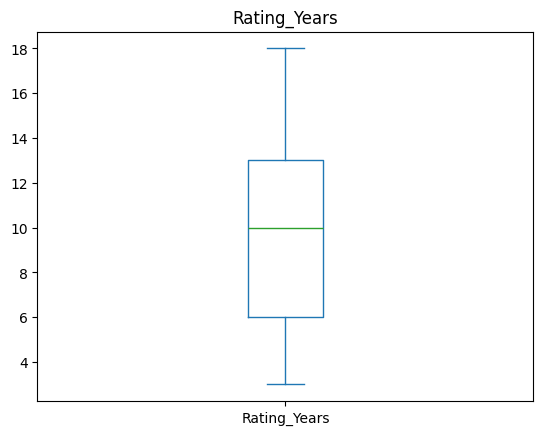

In [ ]:
df['Rating_Years'].plot.box()
plt.title('Rating_Years')
plt.show()

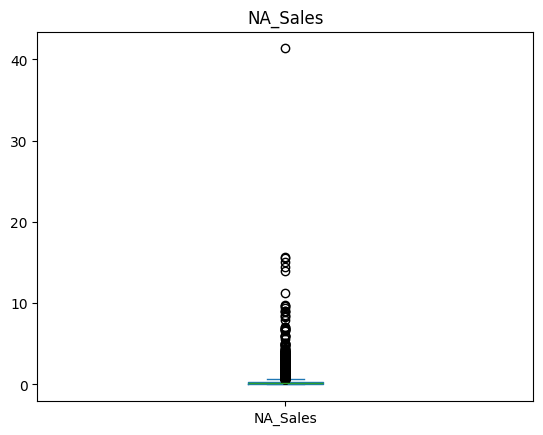

In [ ]:
df['NA_Sales'].plot.box()
plt.title('NA_Sales')
plt.show()

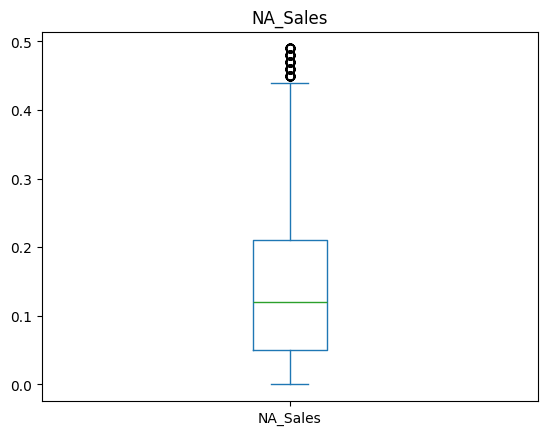

In [72]:
# Cálculo de límites
limit_sup = df['NA_Sales'].mean() + 3 * df['NA_Sales'].std()
limit_inf = df['NA_Sales'].mean() - 3 * df['NA_Sales'].std()

# Valor de la media
media = df['NA_Sales'].mean()

# Reemplazo de outliers con la media
df['NA_Sales'] = df['NA_Sales'].apply(
    lambda x: media if x > limit_sup or x < limit_inf else x
)

df['NA_Sales'].plot.box()
plt.title('NA_Sales')
plt.show()

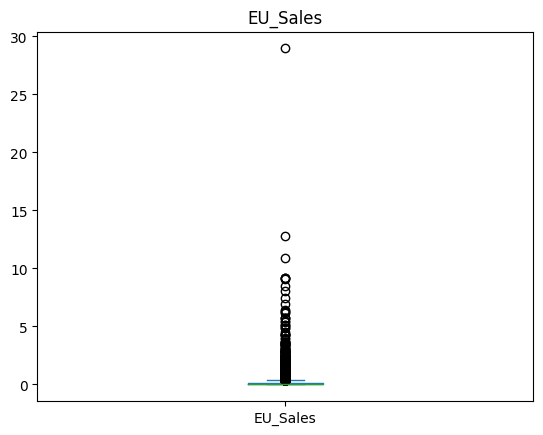

In [43]:
df['EU_Sales'].plot.box()
plt.title('EU_Sales')
plt.show()

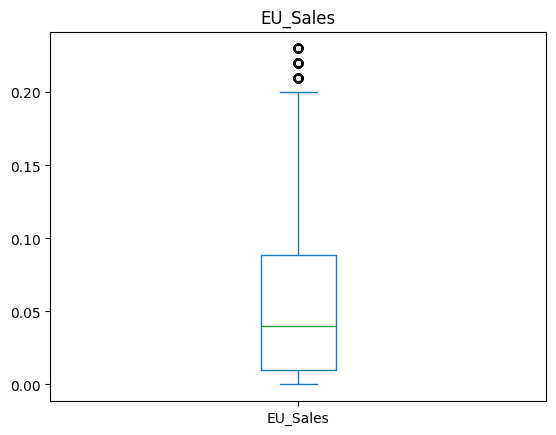

In [91]:
# Cálculo de límites
limit_sup = df['EU_Sales'].mean() + 3 * df['EU_Sales'].std()
limit_inf = df['EU_Sales'].mean() - 3 * df['EU_Sales'].std()

# Valor de la media
media = df['EU_Sales'].mean()

# Reemplazo de outliers con la media
df['EU_Sales'] = df['EU_Sales'].apply(
    lambda x: media if x > limit_sup or x < limit_inf else x
)

df['EU_Sales'].plot.box()
plt.title('EU_Sales')
plt.show()

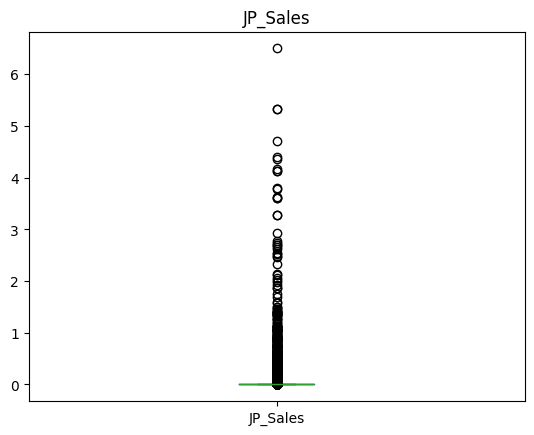

In [44]:
df['JP_Sales'].plot.box()
plt.title('JP_Sales')
plt.show()

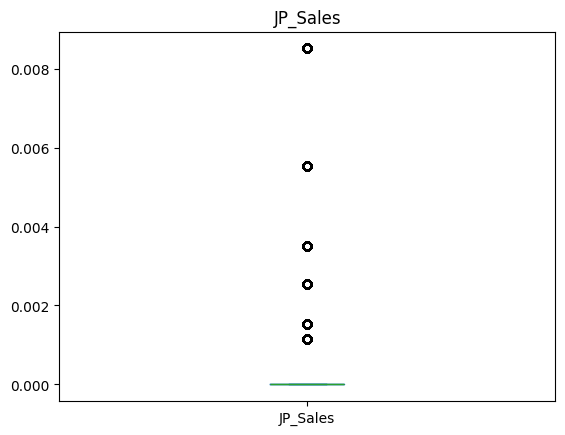

In [100]:
# Cálculo de límites
limit_sup = df['JP_Sales'].mean() + 3 * df['JP_Sales'].std()
limit_inf = df['JP_Sales'].mean() - 3 * df['JP_Sales'].std()

# Valor de la media
media = df['JP_Sales'].mean()

# Reemplazo de outliers con la media
df['JP_Sales'] = df['JP_Sales'].apply(
    lambda x: media if x > limit_sup or x < limit_inf else x
)

df['JP_Sales'].plot.box()
plt.title('JP_Sales')
plt.show()


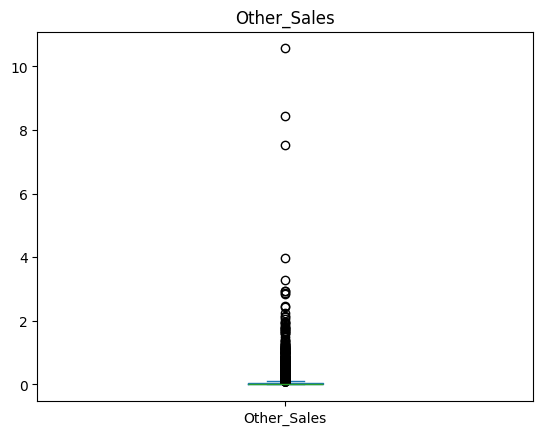

In [45]:
df['Other_Sales'].plot.box()
plt.title('Other_Sales')
plt.show()

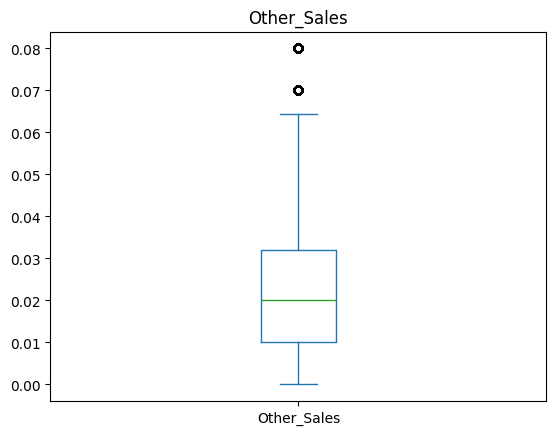

In [112]:
# Cálculo de límites
limit_sup = df['Other_Sales'].mean() + 3 * df['Other_Sales'].std()
limit_inf = df['Other_Sales'].mean() - 3 * df['Other_Sales'].std()

# Valor de la media
media = df['Other_Sales'].mean()

# Reemplazo de outliers con la media
df['Other_Sales'] = df['Other_Sales'].apply(
    lambda x: media if x > limit_sup or x < limit_inf else x
)

df['Other_Sales'].plot.box()
plt.title('Other_Sales')
plt.show()


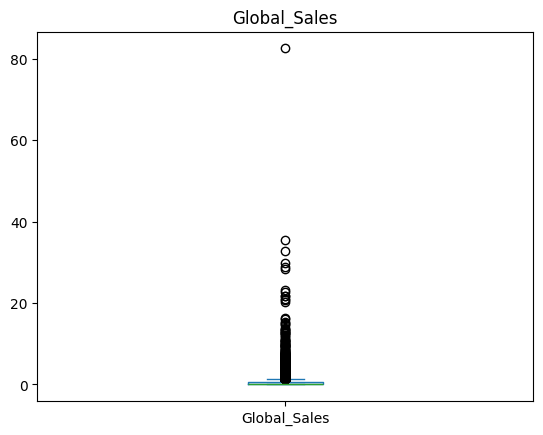

In [46]:
df['Global_Sales'].plot.box()
plt.title('Global_Sales')
plt.show()

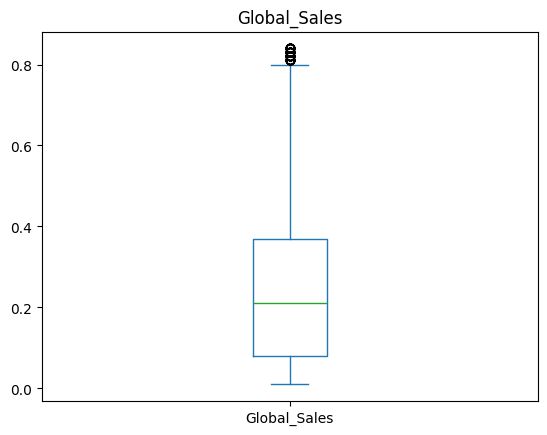

In [138]:
# Cálculo de límites
limit_sup = df['Global_Sales'].mean() + 3 * df['Global_Sales'].std()
limit_inf = df['Global_Sales'].mean() - 3 * df['Global_Sales'].std()

# Valor de la media
media = df['Global_Sales'].mean()

# Reemplazo de outliers con la media
df['Global_Sales'] = df['Global_Sales'].apply(
    lambda x: media if x > limit_sup or x < limit_inf else x
)

df['Global_Sales'].plot.box()
plt.title('Global_Sales')
plt.show()

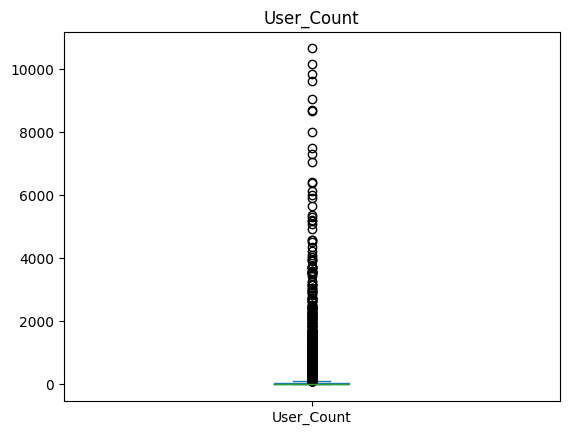

In [52]:
df['User_Count'] = pd.to_numeric(df['User_Count'], errors='coerce')
df['User_Count'].plot.box()
plt.title('User_Count')
plt.show()

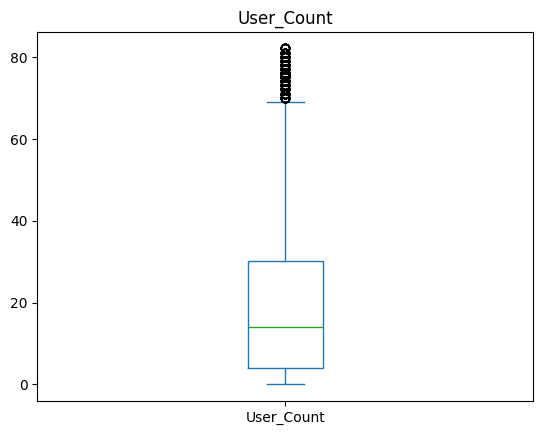

In [180]:
# Cálculo de límites
limit_sup = df['User_Count'].mean() + 3 * df['User_Count'].std()
limit_inf = df['User_Count'].mean() - 3 * df['User_Count'].std()

# Valor de la media
media = df['User_Count'].mean()

# Reemplazo de outliers con la media
df['User_Count'] = df['User_Count'].apply(
    lambda x: media if x > limit_sup or x < limit_inf else x
)

df['User_Count'].plot.box()
plt.title('User_Count')
plt.show()

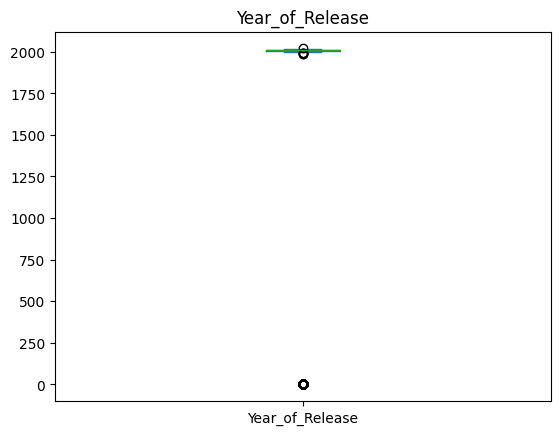

In [53]:
df['Year_of_Release'] = pd.to_numeric(df['Year_of_Release'], errors='coerce')
df['Year_of_Release'].plot.box()
plt.title('Year_of_Release')
plt.show()

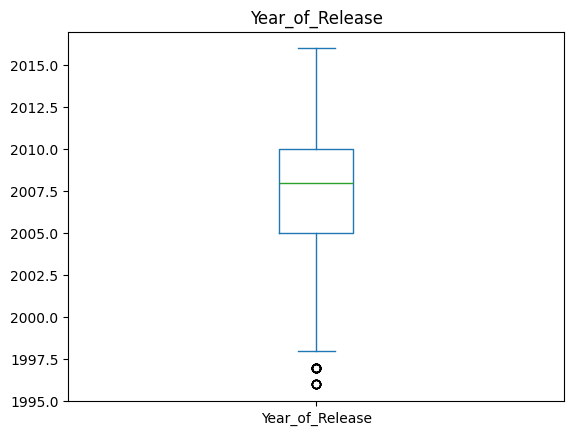

In [190]:
# Cálculo de límites
limit_sup = df['Year_of_Release'].mean() + 3 * df['Year_of_Release'].std()
limit_inf = df['Year_of_Release'].mean() - 3 * df['Year_of_Release'].std()

# Valor de la media
media = df['Year_of_Release'].mean()

# Reemplazo de outliers con la media
df['Year_of_Release'] = df['Year_of_Release'].apply(
    lambda x: media if x > limit_sup or x < limit_inf else x
)

df['Year_of_Release'].plot.box()
plt.title('Year_of_Release')
plt.show()

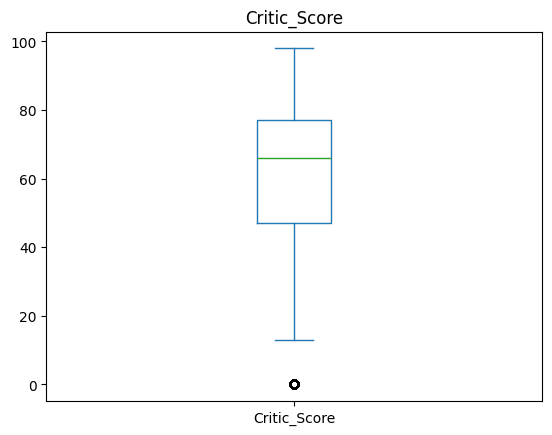

In [54]:
df['Critic_Score'] = pd.to_numeric(df['Critic_Score'], errors='coerce')
df['Critic_Score'].plot.box()
plt.title('Critic_Score')
plt.show()

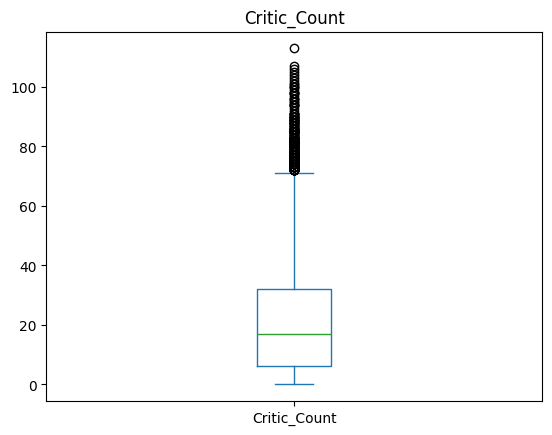

In [55]:
df['Critic_Count'] = pd.to_numeric(df['Critic_Count'], errors='coerce')
df['Critic_Count'].plot.box()
plt.title('Critic_Count')
plt.show()

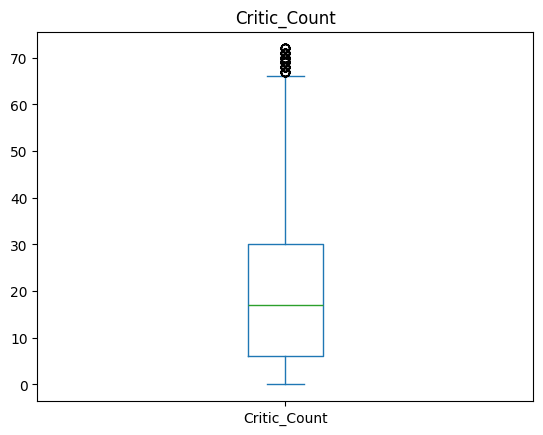

In [210]:
# Cálculo de límites
limit_sup = df['Critic_Count'].mean() + 3 * df['Critic_Count'].std()
limit_inf = df['Critic_Count'].mean() - 3 * df['Critic_Count'].std()

# Valor de la media
media = df['Critic_Count'].mean()

# Reemplazo de outliers con la media
df['Critic_Count'] = df['Critic_Count'].apply(
    lambda x: media if x > limit_sup or x < limit_inf else x
)

df['Critic_Count'].plot.box()
plt.title('Critic_Count')
plt.show()

In [227]:
df[['Year_of_Release','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score_num', 'User_Count', 'User_Score_num', 'Rating_Years']].corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score_num,User_Count,User_Score_num,Rating_Years
Year_of_Release,1.000000,-0.057183,0.007320,0.113855,0.095933,-0.007204,-0.190761,0.009161,-0.276435,0.208748,-0.276435,0.131927
NA_Sales,-0.057183,1.000000,0.446160,0.131199,0.591582,0.743829,0.197714,0.258452,0.079427,0.195697,0.079427,0.002781
EU_Sales,0.007320,0.446160,1.000000,0.165322,0.640382,0.629018,0.282913,0.303746,0.062083,0.334004,0.062083,0.135729
JP_Sales,0.113855,0.131199,0.165322,1.000000,0.199447,0.230288,0.219108,0.261755,0.139679,0.304527,0.139679,0.161173
Other_Sales,0.095933,0.591582,0.640382,0.199447,1.000000,0.731371,0.227641,0.311395,0.038957,0.335063,0.038957,0.099690
Global_Sales,-0.007204,0.743829,0.629018,0.230288,0.731371,1.000000,0.269461,0.322219,0.086190,0.305331,0.086190,0.063821
Critic_Score,-0.190761,0.197714,0.282913,0.219108,0.227641,0.269461,1.000000,0.633152,0.337583,0.472447,0.337583,0.254826
Critic_Count,0.009161,0.258452,0.303746,0.261755,0.311395,0.322219,0.633152,1.000000,0.169261,0.552850,0.169261,0.382677
User_Score_num,-0.276435,0.079427,0.062083,0.139679,0.038957,0.086190,0.337583,0.169261,1.000000,0.127613,1.000000,0.041114
User_Count,0.208748,0.195697,0.334004,0.304527,0.335063,0.305331,0.472447,0.552850,0.127613,1.000000,0.127613,0.399621


In [228]:
df.to_csv('sales_videoGames_proccess.csv')